In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.models import Model

In [8]:
plt.rcParams['figure.figsize'] = [6, 3]

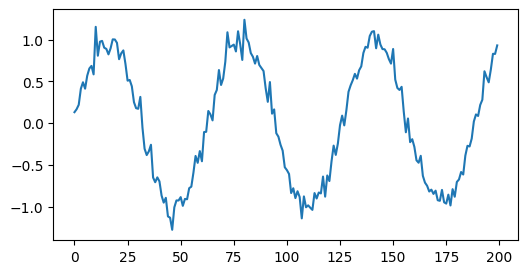

In [74]:
#original data
series = np.sin(0.1 * np.arange(200)) + 0.1 * np.random.randn(200)
plt.plot(series)

In [75]:
T = 10
X = []
Y = []

for i in range(len(series) - T) :
    x = series[i: i+T]
    X.append(x)
    y = series[i+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape) 

(190, 10) (190,)


In [76]:
#Autoregressive Linear Model
i = Input(shape=(T,))
x = Dense(1) (i)
model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')
hist = model.fit(
    X[:N//2], Y[:N//2], 
    validation_data=(
        X[N//2:], 
        Y[N//2:]
    ),
    epochs = 100
)

Epoch 1/100
3/3 [==============================] - 0s 46ms/step - loss: 0.5985 - val_loss: 0.2509
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4557 - val_loss: 0.1705
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1031 - val_loss: 0.0780
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1928 - val_loss: 0.1233
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1100 - val_loss: 0.0229
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0624 - val_loss: 0.1049
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1042 - val_loss: 0.0235
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0344 - val_loss: 0.0541
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0710 - val_loss: 0.0429
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0358 - val_loss: 0.0169
Epoch 11/100
3/3 [=

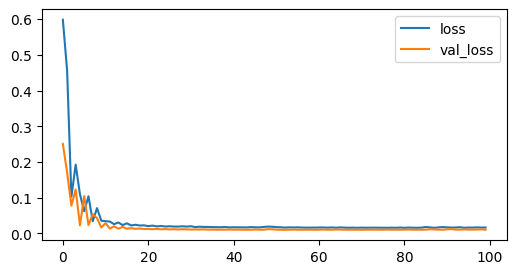

In [78]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()

In [79]:
#1 step prediction- WRONG WAY
validation_target = Y[N//2:]
validation_predictions = []

i = N // 2
while(i < N):
    #x = np.expand_dims(X[i], axis = 0)
    x = X[i].reshape(1, -1)
    p = model.predict(x)
    i+=1
    
    #update predictions
    validation_predictions.append(p)

validation_predictions = np.array(validation_predictions)

1/1 [==============================] - 0s 15ms/step


In [80]:
validation_predictions = validation_predictions.reshape(-1)

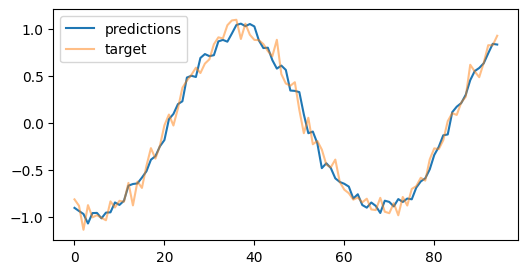

In [81]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target', alpha = 0.5)
plt.legend()

In [82]:
#multi step prediction- CORRECT WAY
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]  #1D array of length T

while(len(validation_predictions) < len(validation_target)):
    #x = np.expand_dims(last_x, axis = 0)
    x = last_x.reshape(1, -1)
    p = model.predict(x)
    
    #update predictions
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, shift = -1)
    last_x[-1] = p.reshape(-1)


validation_predictions = np.array(validation_predictions)

1/1 [==============================] - 0s 16ms/step


In [83]:
validation_predictions = validation_predictions.reshape(-1)

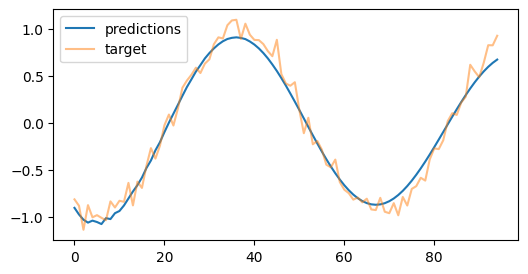

In [84]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target', alpha = 0.5)
plt.legend()